In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('data/train2.csv',index_col=0)

In [3]:
list_constant_attributes =['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 
                           'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 
                           'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 
                           'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 
                           'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 
                           'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 
                           'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 
                           'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 
                           'saldo_medio_var13_medio_hace3']

list_binary_attributes = ['ind_var1_0', 'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 
                          'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 
                          'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 
                          'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 
                          'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 
                          'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 
                          'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 
                          'ind_var29', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 
                          'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 
                          'ind_var37_cte', 'ind_var37_0', 'ind_var37', 'ind_var39_0', 'ind_var40_0', 'ind_var40', 
                          'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var6_0', 'num_var6', 
                          'num_var8', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 
                          'num_var20_0', 'num_var20', 'num_var29_0', 'num_var29', 'num_var34_0', 'num_var34', 
                          'num_var40', 'num_var39', 'num_var44', 'delta_imp_amort_var18_1y3', 
                          'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var13_1y3', 
                          'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3', 
                          'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var13_1y3', 
                          'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_out_1y3', 
                          'delta_num_trasp_var33_out_1y3', 'imp_reemb_var17_hace3', 'imp_reemb_var33_ult1', 
                          'imp_trasp_var33_out_ult1', 'ind_var7_emit_ult1', 'ind_var7_recib_ult1', 
                          'ind_var10_ult1', 'ind_var10cte_ult1', 'ind_var9_cte_ult1', 'ind_var9_ult1', 
                          'ind_var43_emit_ult1', 'ind_var43_recib_ult1', 'num_var7_emit_ult1', 
                          'num_meses_var13_medio_ult3', 'num_reemb_var13_ult1', 'num_reemb_var17_hace3', 
                          'num_reemb_var33_ult1', 'num_trasp_var17_in_ult1', 
                           'num_trasp_var17_out_ult1', 'num_trasp_var33_in_hace3', 'num_trasp_var33_out_ult1', 
                          'saldo_medio_var29_hace3']

In [4]:
import copy
list_binary_attributes_with_target = copy.deepcopy(list_binary_attributes)
list_binary_attributes_with_target.append('TARGET')

In [5]:
import copy
print('Data train initial shape',data_train.shape)
data_train_drop_constant_colums = data_train.drop(list_constant_attributes,axis=1)
print('Data train new shape after dropping constant feature',data_train_drop_constant_colums.shape)
data_train_numeric_feature = data_train_drop_constant_colums.drop(list_binary_attributes,axis=1)
print('Data train new shape only numeric feature',data_train_numeric_feature.shape)
data_train_only_binary_feature = data_train_drop_constant_colums.loc[:,list_binary_attributes_with_target]
print('Data train new shape only binary feature',data_train_only_binary_feature.shape)
np.savetxt('data/data_train_numeric_feature.csv',data_train_numeric_feature)
np.savetxt('data/data_train_only_binary_feature.csv',data_train_only_binary_feature)


Data train initial shape (76020, 370)
Data train new shape after dropping constant feature (76020, 336)
Data train new shape only numeric feature (76020, 231)
Data train new shape only binary feature (76020, 106)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as score

number_rounds = 3
test_size_value = 0.5
number_trees = 100

matrix_feature = data_train_only_binary_feature.as_matrix()[:,:-1]
labels = data_train_only_binary_feature.as_matrix()[:,-1]

# I am using an initial setting a this stage, then I will do a fine 
# tunning of the parameters.
classifier = RandomForestClassifier(n_estimators=number_trees, 
                                    max_features="sqrt")

f1_score_list = []
cm_list = []
cm_max_list = []

rounds = StratifiedShuffleSplit(n_splits=number_rounds, 
                                test_size=test_size_value,
                                random_state=0)

for train_index, test_index in rounds.split(matrix_feature,labels):
        matrix_train = matrix_feature[train_index]
        classes_train = labels[train_index]
        matrix_test = matrix_feature[test_index]
        classes_test = labels[test_index]
        classifier.fit(matrix_train,classes_train)
        classes_predicted = classifier.predict(matrix_test)
        cm = confusion_matrix(classes_test, classes_predicted,labels=[0,1])
        # normalize the confusion matrix
        cm= cm / cm.astype(np.float).sum(axis=1).reshape(-1,1)
        #this threshold is used for plotting 
        thresh = cm.max() / 2.
        cm_list.append(cm)
        cm_max_list.append(thresh)
        #I compute the score taking into account the weighted schema, 
        #which means weighted by the support (the number of true instances for each label)
        precision, recall, fscore, support = score(classes_test, 
                                                   classes_predicted,
                                                   average='macro')
        f1_score_list.append(fscore)



In [7]:
#The score method used in this case is the F1 score, which is the harmonic mean of precision and recall#The sc 
F1_accuracy_str="F1 accuracy: %0.3f (+/- %0.3f)" % (np.mean(f1_score_list),
                                                    np.std(f1_score_list) * 2)
F1_accuracy = np.mean(f1_score_list)
print(F1_accuracy_str)

F1 accuracy: 0.492 (+/- 0.002)


In [8]:
import pandas as pd
from sklearn.utils import shuffle
print('Extract (randomly) one confusion matrix (Real vs Prediction) from the previous run: ')
shuffle(cm_list,random_state=15)
cnf_matrix = cm_list[0]
dataframe=pd.DataFrame(cnf_matrix,index=['Real happy',' Real unhappy'],columns=['Predicted happy',' Predicted unhappy'])
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(dataframe)

Extract (randomly) one confusion matrix (Real vs Prediction) from the previous run: 
               Predicted happy   Predicted unhappy
Real happy              0.9998              0.0002
 Real unhappy           0.9973              0.0027


In [9]:
data_train_only_binary_feature_happy = data_train_only_binary_feature.loc[data_train_only_binary_feature['TARGET']==0]
print('Size happy:',data_train_only_binary_feature_happy.shape)
data_train_only_binary_feature_unhappy = data_train_only_binary_feature.loc[data_train_only_binary_feature['TARGET']==1]
print('Size unhappy:',data_train_only_binary_feature_unhappy.shape)

Size happy: (73012, 106)
Size unhappy: (3008, 106)


In [10]:
matrix_happy = data_train_only_binary_feature_happy.as_matrix()[:,:-1]
matrix_unhappy = data_train_only_binary_feature_unhappy.as_matrix()[:,:-1]
activation_happy = np.sum(matrix_happy,axis=0)/matrix_happy.shape[1]
activation_unhappy = np.sum(matrix_unhappy,axis=0)/matrix_unhappy.shape[1]

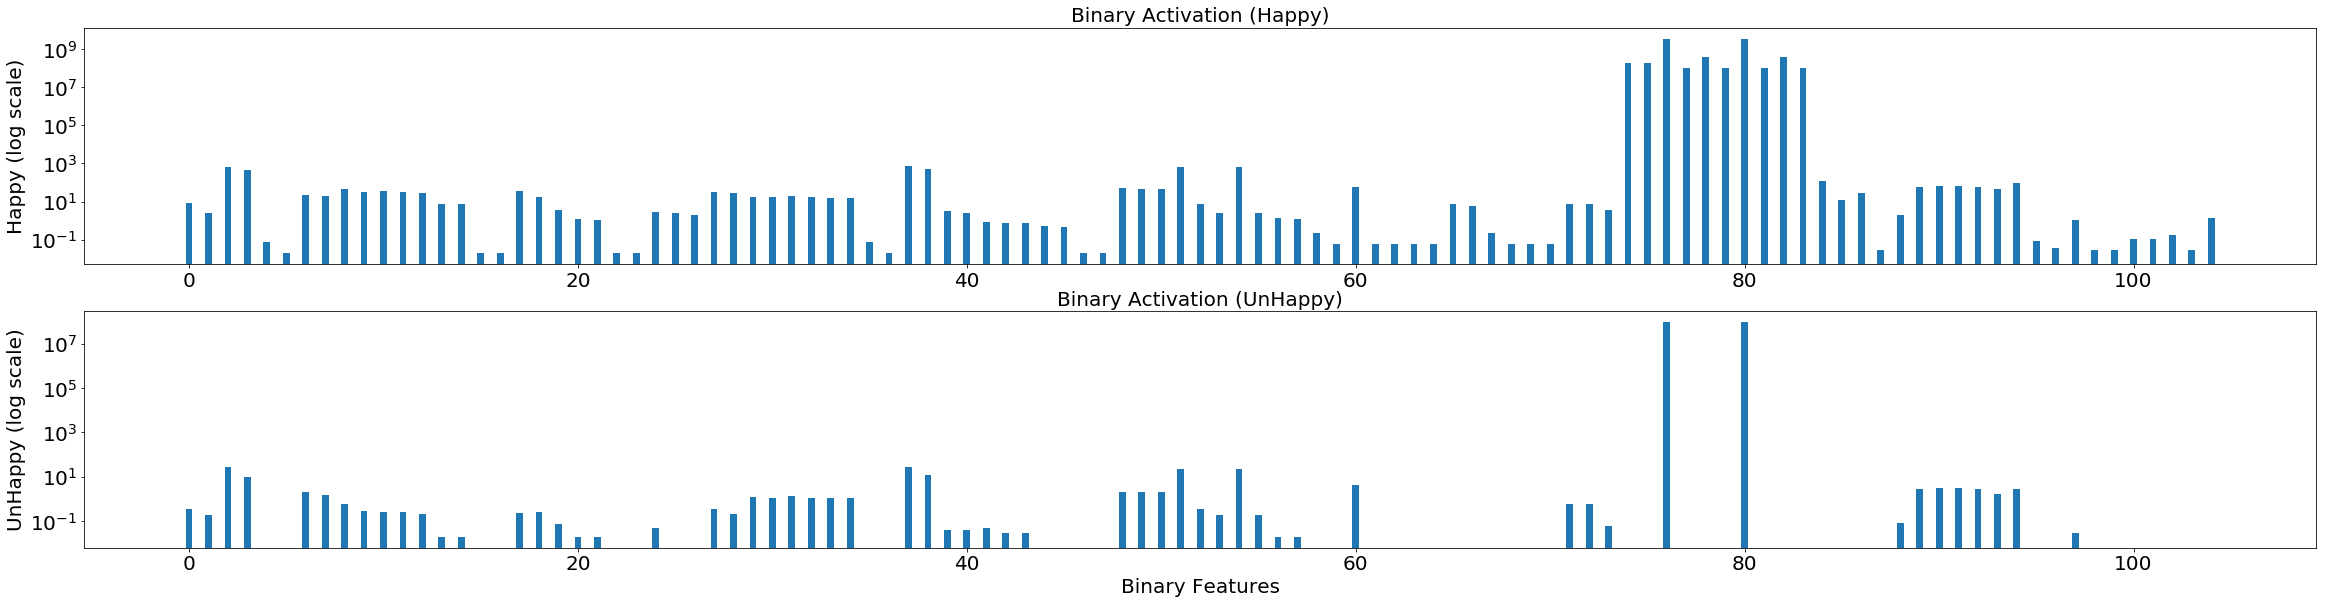

In [24]:
%matplotlib inline

width = .35

ind =range(activation_happy.shape[0])
fig = plt.figure(figsize=(40, 20))
fig.tight_layout() 

ax1 = fig.add_subplot(411)
ax1.bar(ind, activation_happy,width=width,align='center')
ax1.set_yscale("log", nonposy='clip')
plt.title('Binary Activation (Happy)',size=20)
plt.ylabel("Happy (log scale)",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = fig.add_subplot(412,sharex=ax1)
ax2.bar(ind, activation_unhappy,width=width,align='center')
ax2.set_yscale("log", nonposy='clip')
plt.ylabel("UnHappy (log scale)",size=20)
plt.title('Binary Activation (UnHappy)',size=20)
plt.xlabel("Binary Features",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()




In [18]:
from sklearn.preprocessing import binarize
import scipy
dist_list = []
th_list = np.arange(1.0, 20, 0.1)

for th_binarize in th_list :
    activation_happy_binarize = binarize(activation_happy.reshape(1, -1),th_binarize)
    activation_unhappy_binarize = binarize(activation_unhappy.reshape(1, -1),th_binarize)
    distance_xor = np.sum(np.logical_xor(activation_happy_binarize,activation_unhappy_binarize))
    dist_list.append(distance_xor)

import operator
index, value = max(enumerate(dist_list), key=operator.itemgetter(1))
print('Index Distance %d Value Distance %0.3f Threshold %0.3f  '%(index,value,th_list[index]))

Index Distance 12 Value Distance 49.000 Threshold 2.200  


In [29]:
activation_happy_binarize = binarize(activation_happy.reshape(1, -1),2.2)[0,:]
activation_unhappy_binarize = binarize(activation_unhappy.reshape(1, -1),2.2)[0,:]

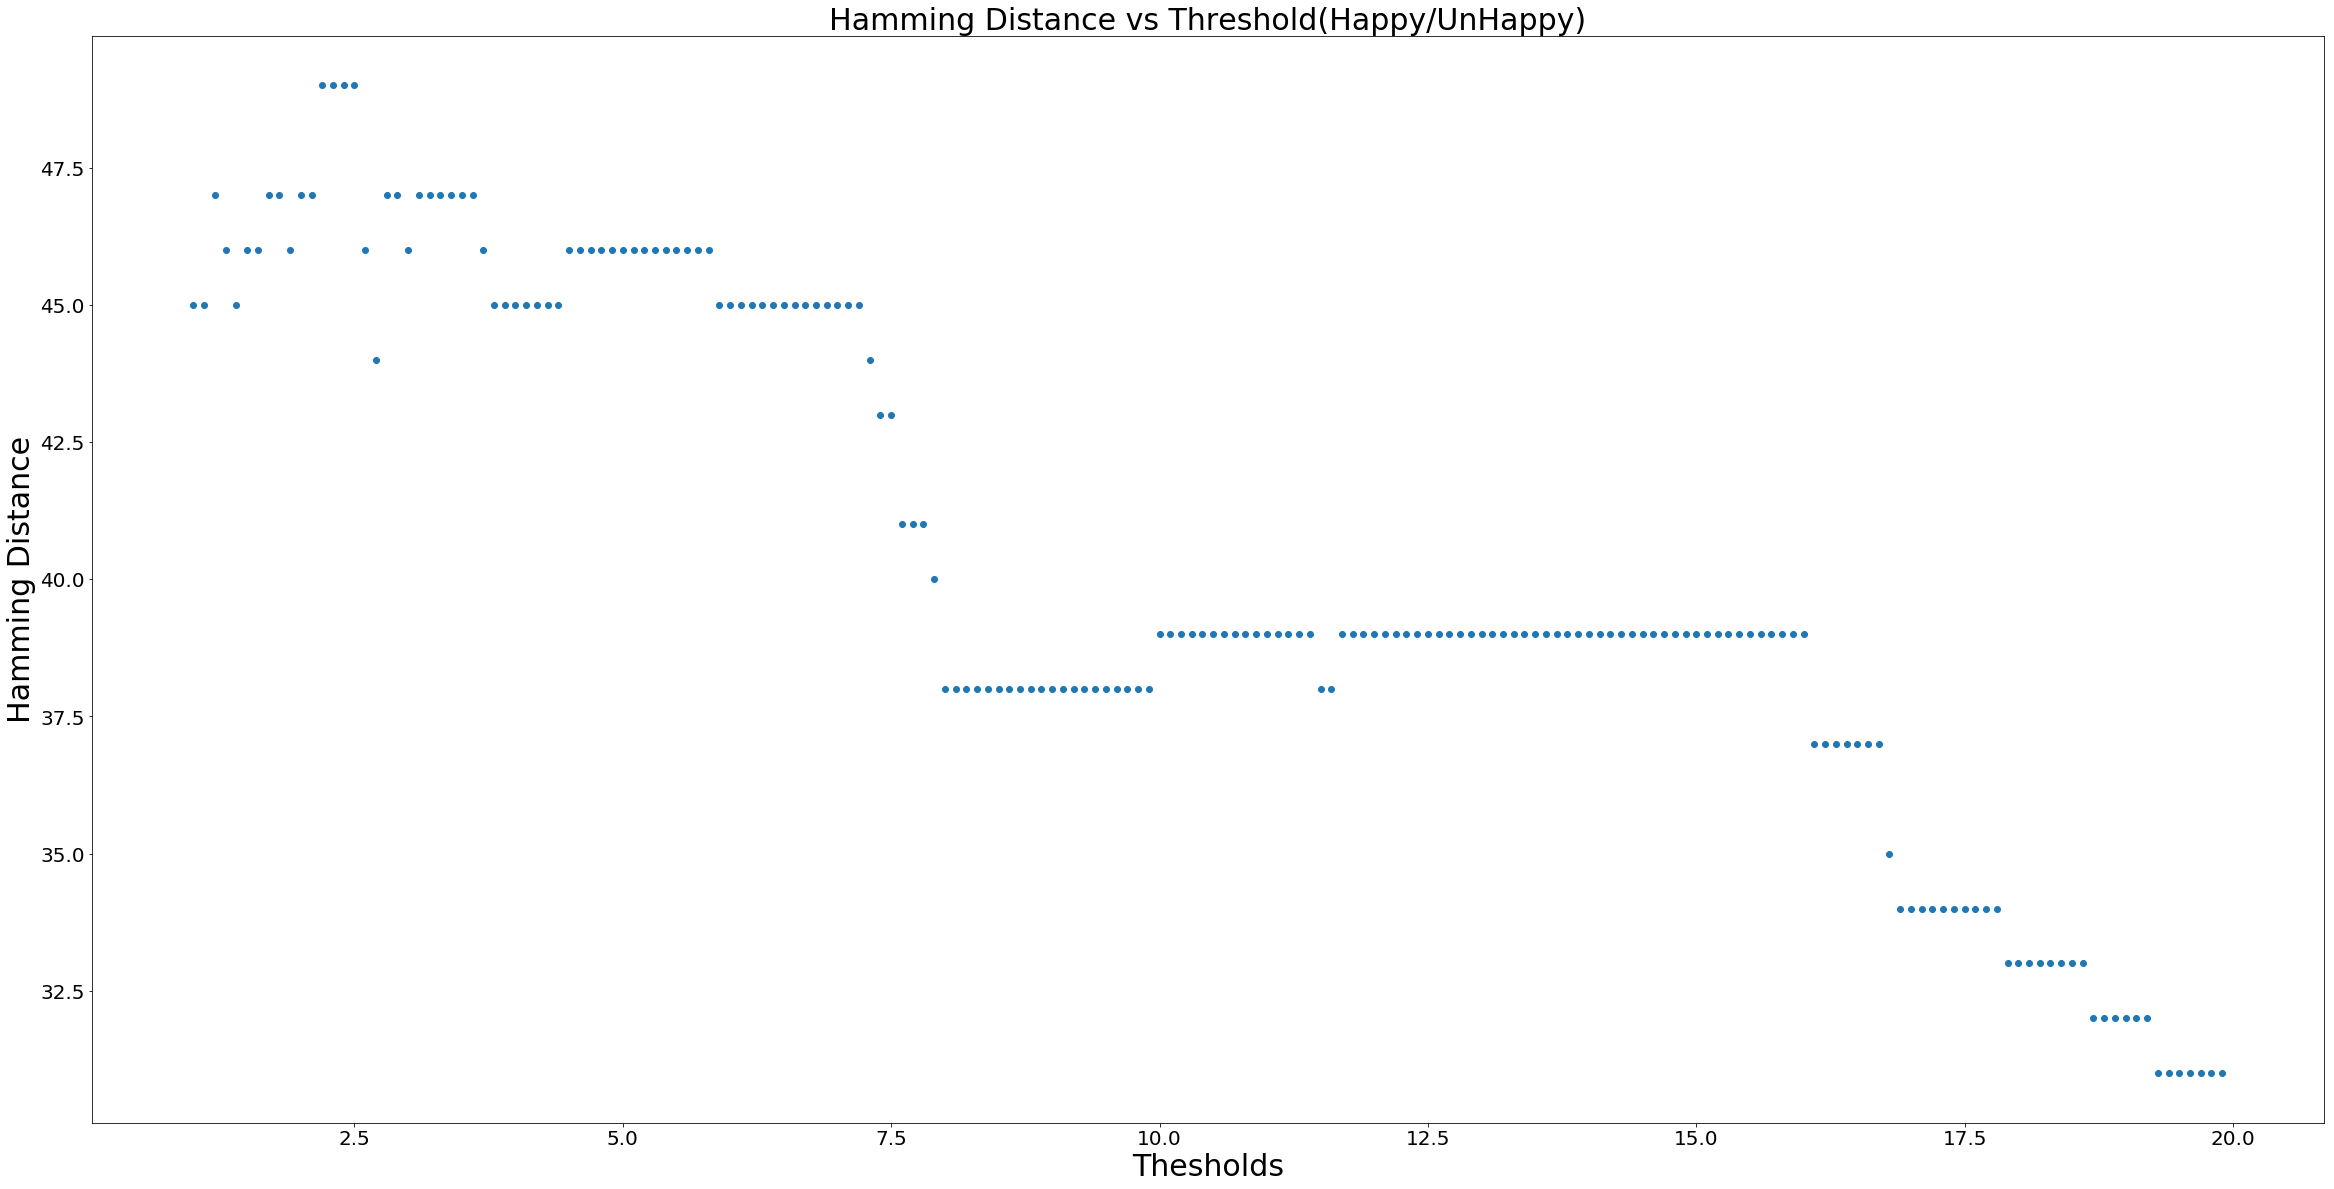

In [25]:
%matplotlib inline

fig = plt.figure(figsize=(40, 20))
fig.tight_layout() 
ax1 = fig.add_subplot(111)
ax1.scatter(th_list, dist_list)
plt.title('Hamming Distance vs Threshold(Happy/UnHappy)',size=30)
plt.ylabel("Hamming Distance",size=30)
plt.xlabel("Thesholds",size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

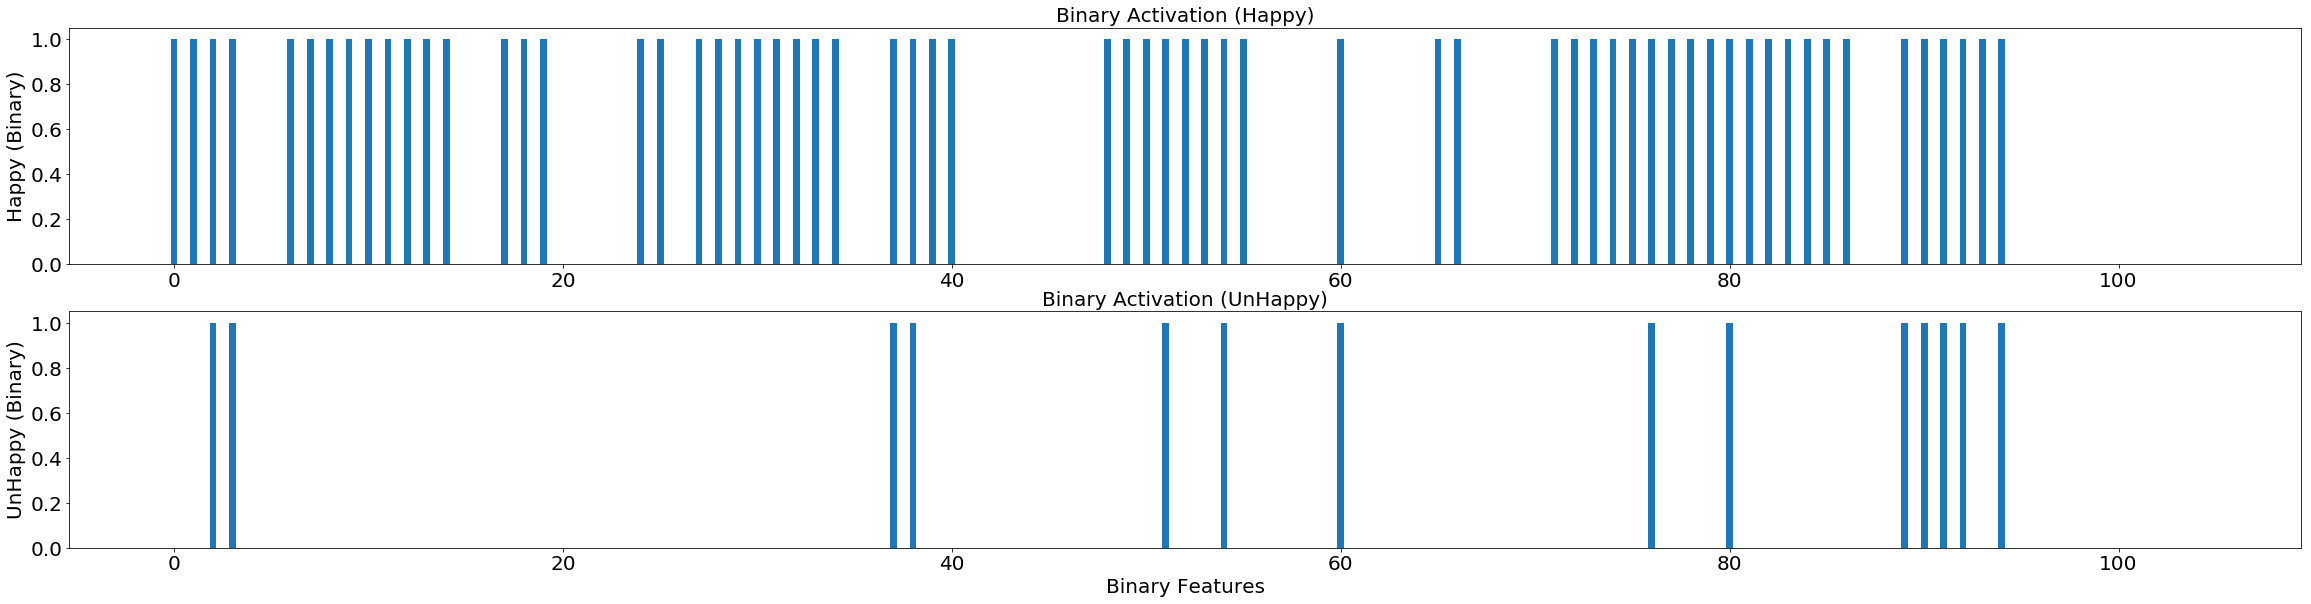

In [31]:
%matplotlib inline

width = .35

ind =range(activation_happy_binarize.shape[0])
fig = plt.figure(figsize=(40, 20))
fig.tight_layout() 

ax1 = fig.add_subplot(411)
ax1.bar(ind, activation_happy_binarize,width=width,align='center')
plt.title('Binary Activation (Happy)',size=20)
plt.ylabel("Happy (Binary)",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = fig.add_subplot(412,sharex=ax1)
ax2.bar(ind, activation_unhappy_binarize,width=width,align='center')
plt.ylabel("UnHappy (Binary)",size=20)
plt.title('Binary Activation (UnHappy)',size=20)
plt.xlabel("Binary Features",size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [59]:
from sklearn.metrics.pairwise import pairwise_distances
happy_array = matrix_happy[np.random.randint(matrix_happy.shape[0]),:].reshape(1, -1)
unhappy_array =  matrix_unhappy[np.random.randint(matrix_unhappy.shape[0]),:].reshape(1, -1)
print(happy_array)
print(unhappy_array)
s='euclidean'
print('happy array vs activation happy',pairwise_distances(happy_array,activation_happy_binarize.reshape(1, -1),metric=s))
print('happy array vs activation unhappy',pairwise_distances(happy_array,activation_unhappy_binarize.reshape(1, -1),metric=s))
print('unhappy array vs activation happy',pairwise_distances(unhappy_array,activation_happy_binarize.reshape(1, -1),metric=s))
print('unhappy array vs activation unhappy',pairwise_distances(unhappy_array,activation_unhappy_binarize.reshape(1, -1),metric=s))



[[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]
happy array vs activation happy [[7.54983444]]
happy array vs activation unhappy [[2.82842712]]
unhappy array vs activation happy [[7.54983444]]
unhappy array vs activation unhappy [[2.82842712]]


In [ ]:

from sklearn.preprocessing import binarize 
from sklearn.neighbors import DistanceMetric


dist = DistanceMetric.get_metric('hamming')
th_list = np.arange(1.0, 20, 0.1)


matrix_feature = data_train_only_binary_feature.as_matrix()[:,:-1]
labels = data_train_only_binary_feature.as_matrix()[:,-1]

number_rounds = 3

f1_score_list = []
cm_list = []
cm_max_list = []

number_rounds=3

rounds = StratifiedShuffleSplit(n_splits=number_rounds, 
                                test_size=test_size_value,
                                random_state=0)

for train_index, test_index in rounds.split(matrix_feature,labels):
        matrix_train = matrix_feature[train_index]
        classes_train = labels[train_index]
        happy_train_matrix= matrix_train[np.where(classes_train==0)[0]]
        unhappy_train_matrix= matrix_train[np.where(classes_train==1)[0]]
        activation_happy = np.sum(happy_train_matrix,axis=0)/happy_train_matrix.shape[1]
        activation_unhappy = np.sum(unhappy_train_matrix,axis=0)/unhappy_train_matrix.shape[1]
        dist_list = []
        for th_binarize in th_list :
            activation_happy_binarize = binarize(activation_happy.reshape(1, -1),th_binarize)
            activation_unhappy_binarize = binarize(activation_unhappy.reshape(1, -1),th_binarize)
            distance_xor = np.sum(np.logical_xor(activation_happy_binarize,activation_unhappy_binarize))
            dist_list.append(distance_xor)

        index, value = max(enumerate(dist_list), key=operator.itemgetter(1))
        th_binary_selected = th_list[index]
        print('Selected threshold ',th_binary_selected)
  
        activation_happy_binarize = binarize(activation_happy.reshape(1, -1),th_binary_selected)
        activation_unhappy_binarize = binarize(activation_unhappy.reshape(1, -1),th_binary_selected)
        
        matrix_test = matrix_feature[test_index]
        matrix_test_binarized = binarize(matrix_test,th_binary_selected)
        happy_dist = dist.pairwise(matrix_test_binarized,activation_happy_binarize.reshape(1,-1))
        unhappy_dist = dist.pairwise(matrix_test_binarized,activation_unhappy_binarize.reshape(1,-1))
        happy_vs_unhappy = happy_dist>unhappy_dist
        classes_predicted = np.where(happy_vs_unhappy==True, 0, 1)
        classes_test = labels[test_index]
        cm = confusion_matrix(classes_test, classes_predicted,labels=[0,1])
        # normalize the confusion matrix
        cm= cm / cm.astype(np.float).sum(axis=1).reshape(-1,1)
        #this threshold is used for plotting 
        thresh = cm.max() / 2.
        cm_list.append(cm)
        cm_max_list.append(thresh)
        #I compute the score taking into account the weighted schema, 
        #which means weighted by the support (the number of true instances for each label)
        precision, recall, fscore, support = score(classes_test, 
                                                   classes_predicted,
                                                   average='macro')
        f1_score_list.append(fscore)
        
        
 
        

In [ ]:
#The score method used in this case is the F1 score, which is the harmonic mean of precision and recall#The sc 
F1_accuracy_str="F1 accuracy: %0.3f (+/- %0.3f)" % (np.mean(f1_score_list),
                                                    np.std(f1_score_list) * 2)
F1_accuracy = np.mean(f1_score_list)
print(F1_accuracy_str)

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
print('Extract (randomly) one confusion matrix (Real vs Prediction) from the previous run: ')
shuffle(cm_list,random_state=15)
cnf_matrix = cm_list[0]
dataframe=pd.DataFrame(cnf_matrix,index=['Real happy',' Real unhappy'],columns=['Predicted happy',' Predicted unhappy'])
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(dataframe)

In [ ]:
a=pd.DataFrame([[0,1,0,1],[0,1,1,0],[0,1,1,1]])
print(a)
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('hamming')
happy=dist.pairwise(a,np.array([1,0,0,0]).reshape(1,-1))
unhappy=dist.pairwise(a,np.array([0,0,1,0]).reshape(1,-1))
aa3=happy>unhappy
print(happy)
print(unhappy)
aa4=np.where(aa3==True, 0, 1)
print(aa4)

In [ ]:
 import pdb
        pdb.set_trace()
        index_happy = classes_train[classes_train==0]
        index_unhappy = classes_train[classes_train==1]
        
        matrix_test = matrix_feature[test_index]
        classes_test = labels[test_index]
        classifier.fit(matrix_train,classes_train)
        classes_predicted = classifier.predict(matrix_test)
        cm = confusion_matrix(classes_test, classes_predicted,labels=[0,1])
        # normalize the confusion matrix
        cm= cm / cm.astype(np.float).sum(axis=1).reshape(-1,1)
        #this threshold is used for plotting 
        thresh = cm.max() / 2.
        cm_list.append(cm)
        cm_max_list.append(thresh)
        #I compute the score taking into account the weighted schema, 
        #which means weighted by the support (the number of true instances for each label)
        precision, recall, fscore, support = score(classes_test, 
                                                   classes_predicted,
                                                   average='macro')
        f1_score_list.append(fscore)

